In [3]:
%pylab inline
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models.widgets import Slider


Populating the interactive namespace from numpy and matplotlib


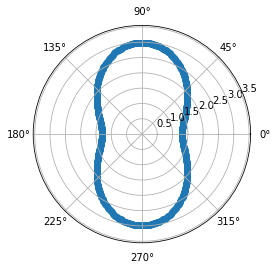

In [78]:
plt.axes(projection='polar')

gra = np.linspace(0,360, num =361)
def gR(theta):
    return theta*(np.pi/180)
def In(rad, fas):
    return 4*( (np.cos(np.pi*np.sin(rad)/4) - fas )**2)

plt.scatter(gR(gra), In(gR(gra), gR(90)))

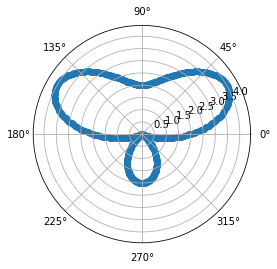

In [16]:
plt.axes(projection='polar')

ang = np.linspace(0,360, num = 361)
def Il2(ang):
    return 4*(np.cos( (np.pi*np.sin(ang)/2)- 45*(np.pi/180) ))**2
plt.scatter(ang, Il2(ang))
#def I()

In [10]:
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider

x = [x*0.005 for x in range(0, 201)]

source = ColumnDataSource(data=dict(x=x, y=x))

plot = figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

slider = Slider(start=0.1, end=6, value=1, step=.1, title="d")

update_curve = CustomJS(args=dict(source=source, slider=slider), code="""
    var data = source.data;
    var f = slider.value;
    var x = data['x']
    var y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], f)
    }
    
    // necessary becasue we mutated source.data in-place
    source.change.emit();
""")
slider.js_on_change('value', update_curve)


show(column(slider, plot))

In [24]:
import plotly.graph_objects as go
gra = np.linspace(0,360, num =361)
def gR(theta):
    return theta*(np.pi/180)
def In(rad, fas):
    return 4*( (np.cos(np.pi*np.sin(rad)/4 - fas )**2) )
fig = go.Figure(data=
    go.Scatterpolar(
        r = In(gR(gra), gR(45)),
        theta = gra,
        mode = 'markers',
    ))

fig.update_layout(showlegend=False)
fig.show()

In [22]:
import plotly.graph_objects as go
gra = np.linspace(0,360, num =361)
def gR(theta):
    return theta*(np.pi/180)
def In(gra, fas):
    return 4*( (np.cos(np.pi*np.sin(gR(gra) )/2) - fas )**2)
fig = go.Figure(data=
    go.Scatterpolar(
        r = In(gra, 45),
        theta = gra,
        mode = 'markers',
    ))

fig.update_layout(showlegend=False)
fig.show()